<a href="https://colab.research.google.com/github/AakashAhuja30/Deep-Learning/blob/master/Autoencoder_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

# Test the Sparsity constraint on autoencoder


Sparsity Function
$$\sum_i \ log(x_i^2+1)$$

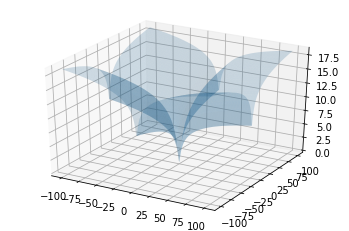

In [2]:
x1=np.array([np.arange(-100,100,0.1)]).T 
x2=np.array([np.arange(-100,100,0.1)])
y=np.zeros((x1.shape[0],x2.shape[1]))
y=(np.log(1+x1**2)+np.log(1+x2**2))    
x1c, x2c=np.meshgrid(x1,x2)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x1c, x2c, y, alpha=.2)
plt.show()

Creating the data(baby faces)

In [3]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((8,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X=X.T

W=np.zeros((8,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W=W.T

Train Naive AE: Without constraints

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
x=tf.placeholder(tf.float32)
lr=tf.constant(0.001)
#Encoder Weight
We=tf.Variable((tf.random_uniform((8,21*21))-0.5)*0.001,dtype=tf.float32)
#Decoder Weight: Transpose of encoder weight?
Wd=tf.transpose(We)

Xh=Wd@We@X
loss=tf.reduce_sum((X-Xh)**2)
updateWe=tf.assign(We,We-lr*tf.gradients(loss,We)[0])
sess=tf.InteractiveSession()
tf.global_variables_initializer().run()
maxitr=200
errt=np.zeros(maxitr)
for i in range(maxitr):
  for j in range(X.shape[1]): 
    errt[i],_=sess.run([loss,updateWe],feed_dict={x:X[:,j]})
Wnp=We.eval()
Xhnp=Xh.eval()
sess.close()  



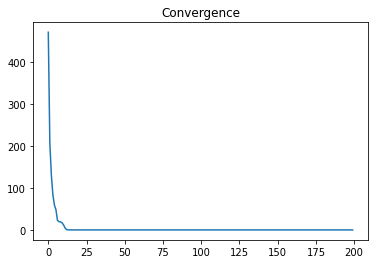

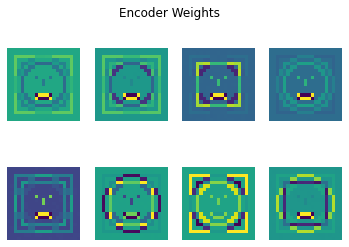

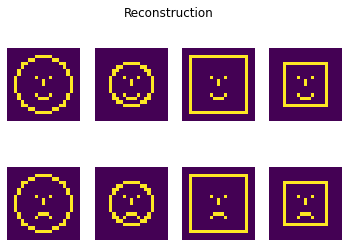

In [6]:
plt.figure()
plt.plot(errt)
plt.title('Convergence')

plt.figure()
plt.suptitle('Encoder Weights')
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(Wnp[i*4+j,:].reshape((21,21)))
    plt.axis('off')


plt.figure()
plt.suptitle('Reconstruction')    
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(Xhnp[:,i*4+j].reshape((21,21)))
    plt.axis('off')




# Training Sparse AE: Introducing constraints to the loss 

In [7]:
x=tf.placeholder(tf.float32)
lr=tf.constant(0.001)
lamda=tf.constant(.2)
#Encoder Weight
We=tf.Variable((tf.random_uniform((8,21*21))-0.5)*0.001,dtype=tf.float32)
#Decoder Weight: Transpose of encoder weight?
Wd=tf.transpose(We)

Z=We@X
Xh=Wd@Z
loss=tf.reduce_sum((X-Xh)**2) + lamda*tf.reduce_sum(tf.log(1+Z**2))
updateWe=tf.assign(We,We-lr*tf.gradients(loss,We)[0])

sess=tf.InteractiveSession()
tf.global_variables_initializer().run()
maxitr=200
errt=np.zeros(maxitr)
for i in range(maxitr):
  for j in range(X.shape[1]): 
    errt[i],_=sess.run([loss,updateWe],feed_dict={x:X[:,j]})
Wnp=We.eval()
Xhnp=Xh.eval()
sess.close()  



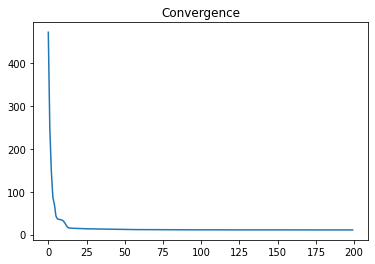

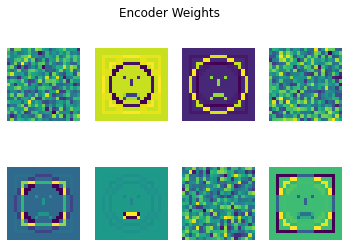

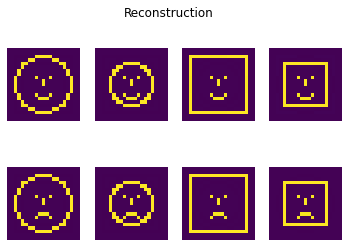

In [8]:
plt.figure()
plt.plot(errt)
plt.title('Convergence')

plt.figure()
plt.suptitle('Encoder Weights')
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(Wnp[i*4+j,:].reshape((21,21)))
    plt.axis('off')


plt.figure()
plt.suptitle('Reconstruction')    
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(Xhnp[:,i*4+j].reshape((21,21)))
    plt.axis('off')




Nonnegative matrix factorization

In [9]:
x=tf.placeholder(tf.float32)
lr=tf.constant(0.001)
lamda=tf.constant(.2)
#Encoder Weight
We=tf.Variable((tf.random_uniform((8,21*21))-0.5)*0.001,dtype=tf.float32)
#Decoder Weight: Transpose of encoder weight?
Wd=tf.transpose(We)

Z= tf.nn.relu(We)@X
Xh= tf.nn.relu(Wd)@Z
loss=tf.reduce_sum((X-Xh)**2) #No contstraint needed as relu constraint already applied above
updateWe=tf.assign(We,We-lr*tf.gradients(loss,We)[0])

sess=tf.InteractiveSession()
tf.global_variables_initializer().run()
maxitr=200
errt=np.zeros(maxitr)
for i in range(maxitr):
  for j in range(X.shape[1]): 
    errt[i],_=sess.run([loss,updateWe],feed_dict={x:X[:,j]})
Wnp=We.eval()
Xhnp=Xh.eval()
sess.close()  


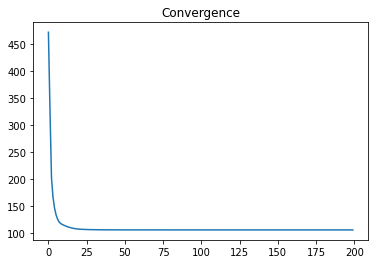

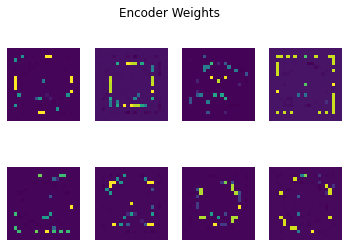

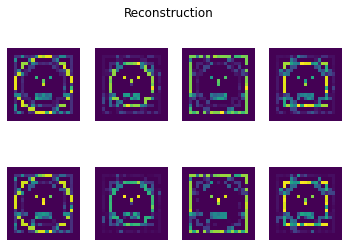

In [10]:
plt.figure()
plt.plot(errt)
plt.title('Convergence')

plt.figure()
plt.suptitle('Encoder Weights')
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(Wnp[i*4+j,:].reshape((21,21)))
    plt.axis('off')


plt.figure()
plt.suptitle('Reconstruction')    
for i in range(2):
  for j in range(4):
    ax=plt.subplot2grid((2, 4), (i, j))
    ax.imshow(Xhnp[:,i*4+j].reshape((21,21)))
    plt.axis('off')
